In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pytz

from fps_dfs_optimizer.src.draftkings_tools import get_players_from_salaries
from fps_dfs_optimizer.src.draftkings_tools import EntriesHandler
from fps_dfs_optimizer.src.optimizer import Reoptimizer

In [2]:
projections_file_name = '20220120'
entries_file_name = 'DKSalaries_Levert'

projections_path = f'C:\\Users\\Jack\\Desktop\\proj\\{projections_file_name}.csv'

df_players = get_players_from_salaries(
    projections_path, 
    tz='US/Eastern'
)

# df_players = get_players_from_salaries(
#     '../data/raw/xDKSalaries_20210206_Early_2.csv', 
#     tz='US/Eastern'
# )

In [3]:
df_game_summary = df_players.groupby('Game').first()[['Time']].reset_index().sort_values(by='Time')
df_game_summary

,Game,Time
1,POR @ NY,2021-02-06 18:00:00+00:00
0,DEN @ SAC,2021-02-06 22:00:00+00:00


In [4]:
time = dt.datetime.now(pytz.UTC)

## If testing, run the next code block to change the time

In [5]:
#time = time.replace(month=2, day=6, hour=18, minute=30)

In [6]:
df_game_summary['Locked'] = df_game_summary['Time'] < time
df_game_summary

,Game,Time,Locked
1,POR @ NY,2021-02-06 18:00:00+00:00,True
0,DEN @ SAC,2021-02-06 22:00:00+00:00,False


In [7]:
df_players['locked'] = df_players['Time'] < time

In [8]:
df_players[df_players['projections']==0]['min_exp'] = 0

In [9]:
sheet_name = 'DKEntries_Levert.csv'
entries = EntriesHandler('../data/raw/' + sheet_name, df_players, read_lineups=True)

`infer_max_exposure()` is a utility function that just infers the exposure from the sheet being read this will replace whatever is in `entries.df['max_exp']`

In [10]:
entries.infer_max_exps(buffer=0.2)

In [11]:
entries.df

,Name,ID,Position,Salary,Game,Time,TeamAbbrev,projections,std,min_exp,max_exp,locked
Name,,,,,,,,,,,,
Nikola Jokic,Nikola Jokic,16337687,C,10800,DEN @ SAC,2021-02-06 22:00:00+00:00,DEN,59.18,10.778,0,0.75,False
Jamal Murray,Jamal Murray,16337704,PG,7000,DEN @ SAC,2021-02-06 22:00:00+00:00,DEN,0.00,8.233,0,0.75,False
Michael Porter Jr.,Michael Porter Jr.,16337726,SF/PF,6000,DEN @ SAC,2021-02-06 22:00:00+00:00,DEN,36.00,6.918,0,0.25,False
Will Barton,Will Barton,16337746,SG/SF,5400,DEN @ SAC,2021-02-06 22:00:00+00:00,DEN,26.92,9.182,0,0.65,False
Gary Harris,Gary Harris,16337757,SG/SF,4900,DEN @ SAC,2021-02-06 22:00:00+00:00,DEN,0.00,0.000,0,0.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Robert Woodard II,Robert Woodard II,16337868,SG/SF,3000,DEN @ SAC,2021-02-06 22:00:00+00:00,SAC,0.00,0.000,0,0.20,False
DaQuan Jeffries,DaQuan Jeffries,16337903,SF,3000,DEN @ SAC,2021-02-06 22:00:00+00:00,SAC,0.00,0.000,0,0.20,False
Kyle Guy,Kyle Guy,16337876,PG,3000,DEN @ SAC,2021-02-06 22:00:00+00:00,SAC,8.61,5.335,0,0.20,False


In [13]:
reopt = Reoptimizer(
    entries, 
    verbose=False,
    timelimit=20, 
    mipgap=0.002, 
    visualize=True
)

In [14]:
reopt.initialize()

Unfilled spots remaining: 115


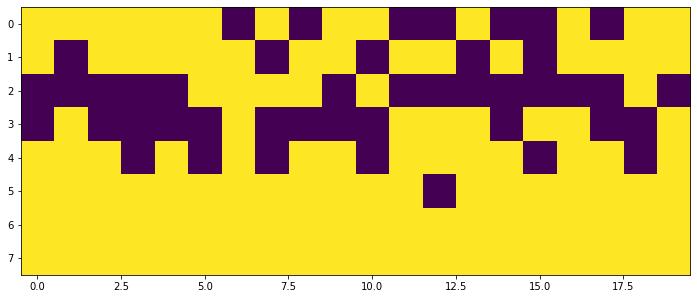



Cutoff set to 0.95; 15 variables converted to binaries


Unfilled spots remaining: 64


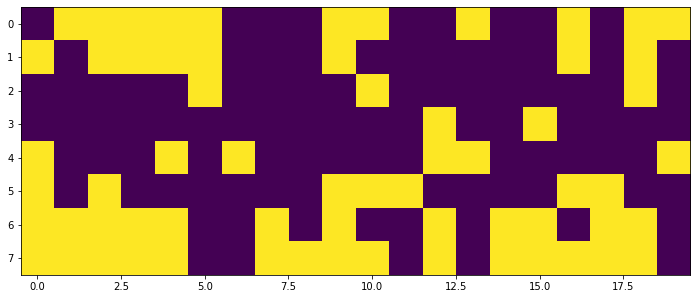



Cutoff set to 0.9; 4 variables converted to binaries


Unfilled spots remaining: 42


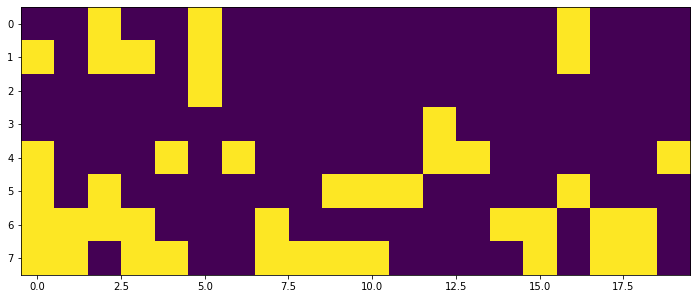



Cutoff set to 0.85; 9 variables converted to binaries


Unfilled spots remaining: 32


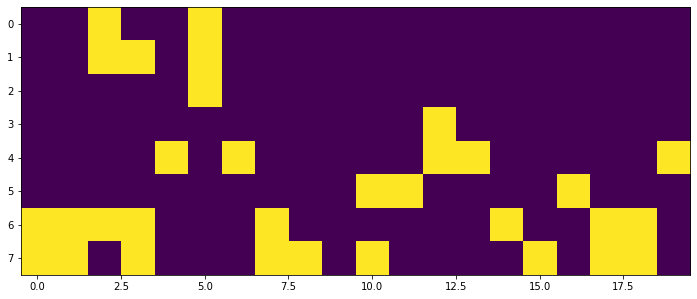



Cutoff set to 0.8; 8 variables converted to binaries


Unfilled spots remaining: 26


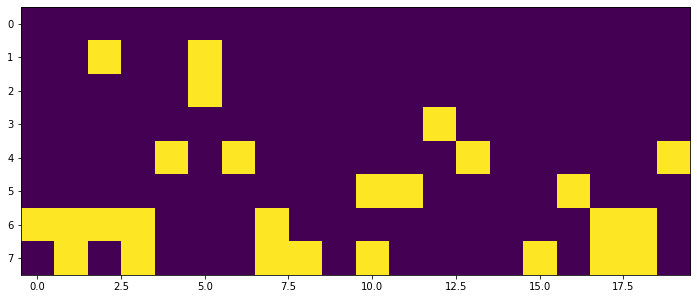



Cutoff set to 0.75; 2 variables converted to binaries


Unfilled spots remaining: 20


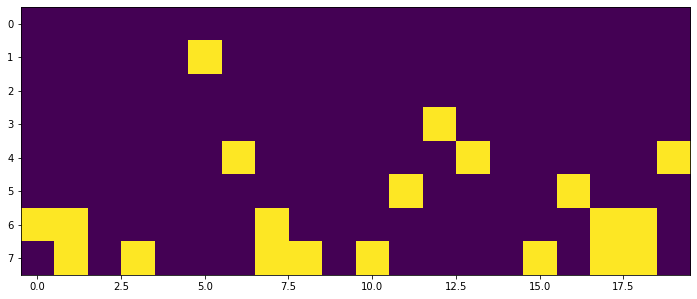



Cutoff set to 0.7; 2 variables converted to binaries


Unfilled spots remaining: 20


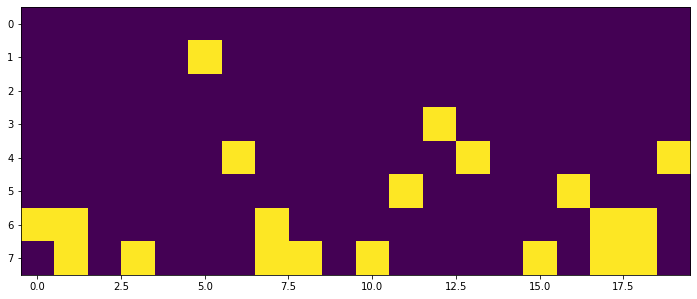



Cutoff set to 0.6499999999999999; 7 variables converted to binaries


Unfilled spots remaining: 18


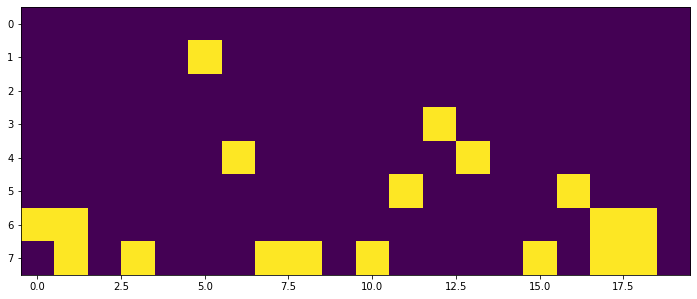



Cutoff set to 0.6; 7 variables converted to binaries


Unfilled spots remaining: 14


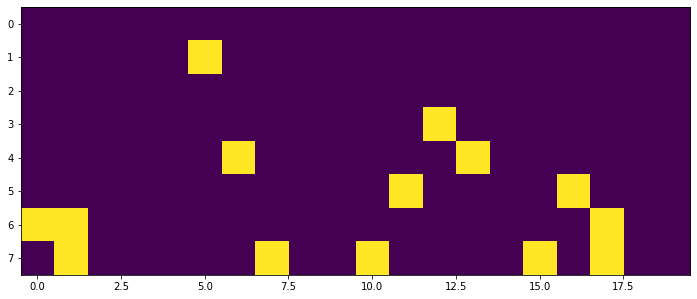



Cutoff set to 0.55; 10 variables converted to binaries


Unfilled spots remaining: 12


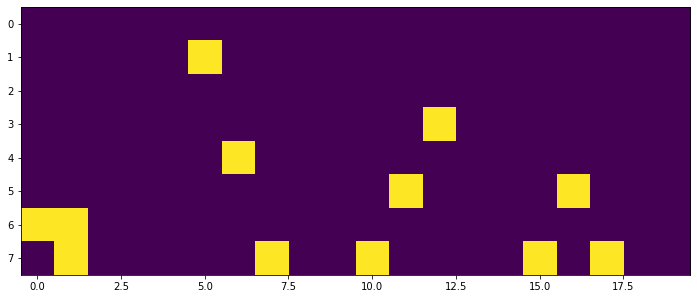



Cutoff set to 0.5; 7 variables converted to binaries


Unfilled spots remaining: 7


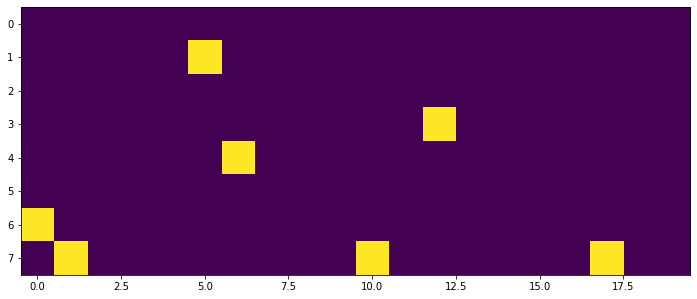



Cutoff set to 0.44999999999999996; 7 variables converted to binaries


Unfilled spots remaining: 6


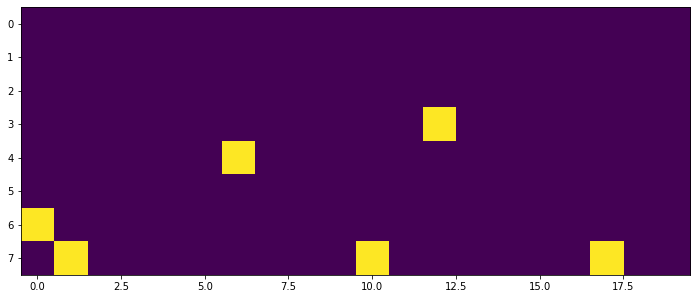



Cutoff set to 0.3999999999999999; 7 variables converted to binaries


Unfilled spots remaining: 5


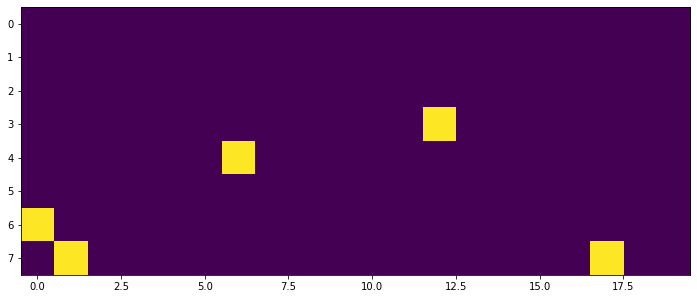



Cutoff set to 0.35; 1 variables converted to binaries


Unfilled spots remaining: 1


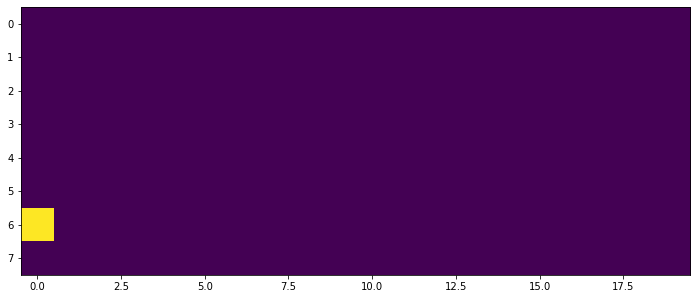



Cutoff set to 0.29999999999999993; 1 variables converted to binaries


Unfilled spots remaining: 1


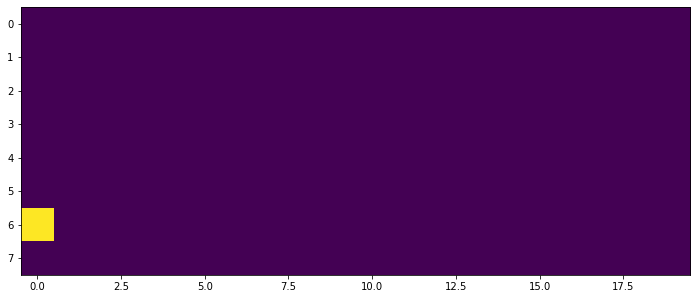



Cutoff set to 0.25; 2 variables converted to binaries


Unfilled spots remaining: 1


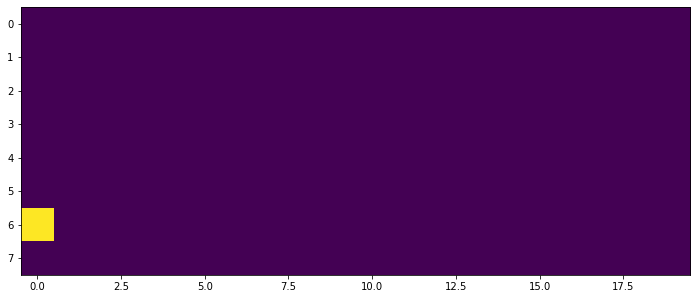



Cutoff set to 0.19999999999999996; 2 variables converted to binaries


Unfilled spots remaining: 1


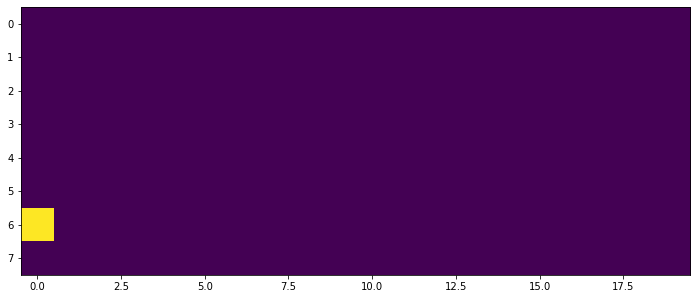



Cutoff set to 0.1499999999999999; 0 variables converted to binaries


Unfilled spots remaining: 0


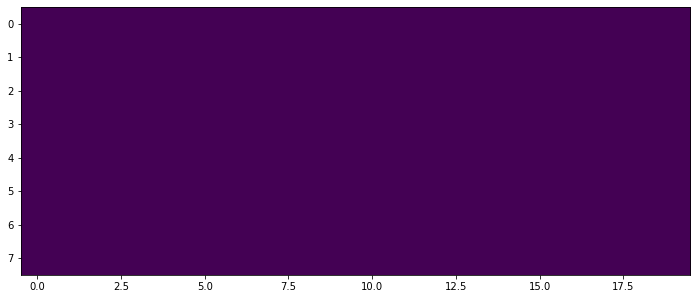

In [15]:
reopt.solve()

In [16]:
reopt.summarize()[:60]

,Before,After,Difference
Jamal Murray,0.55,0.00,-0.55
Harrison Barnes,0.65,0.45,-0.20
Michael Porter Jr.,0.05,0.25,0.20
Will Barton,0.45,0.65,0.20
Monte Morris,0.65,0.85,0.20
Marvin Bagley III,0.15,0.00,-0.15
Paul Millsap,0.45,0.35,-0.10
Jabari Parker,0.00,0.10,0.10
De'Aaron Fox,0.50,0.60,0.10
Buddy Hield,0.20,0.30,0.10


## Pre-reopt summary

In [17]:
print('Average lineup projected score: {:.2f}'.format(
    entries.map_to_col('projections').sum(axis=1).sum()/len(entries.df_entries))
)
print('Average lineup salary: {:.2f}'.format(
    entries.map_to_col('Salary').sum(axis=1).sum()/len(entries.df_entries))
)

Average lineup projected score: 230.78
Average lineup salary: 49990.00


## Post-reopt summary

In [18]:
entries.add_lineups_to_entries(reopt.df_optimal, drop_entries=True, version='reopt')

print('Average lineup projected score: {:.2f}'.format(
    entries.map_to_col('projections').sum(axis=1).sum()/len(entries.df_entries))
)
print('Average lineup salary: {:.2f}'.format(
    entries.map_to_col('Salary').sum(axis=1).sum()/len(entries.df_entries))
)

Average lineup projected score: 243.70
Average lineup salary: 48810.00
